## SARIMAX stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous variables.

Here’s a simple and detailed explanation:

## What is SARIMAX?
- SARIMAX is a time series forecasting model.
- It is an advanced version of ARIMA that can:

- Handle seasonal patterns in your data (like daily, weekly, or yearly cycles).
- Use extra features (called exogenous variables), such as weather, battery health, or any other information that might affect your target.
## Breaking down the name:
- S: Seasonal — It can model repeating patterns (like higher charging in summer).
- AR: AutoRegressive — Uses past values to predict the future.
- I: Integrated — Makes the data more stable by differencing (subtracting previous values).
- MA: Moving Average — Uses past errors to improve predictions.
- X: Exogenous — Allows you to add other variables (features) that help with prediction.
## Why use SARIMAX?
- If your data has seasonal trends (like more charging on weekends), SARIMAX can model that.
- If you have other features (like temperature, charger type, etc.), SARIMAX can use them to make better predictions.
- It is more powerful than ARIMA for real-world problems where many factors affect the target.
## Example
- Suppose you want to predict charging duration for electric vehicles:

- Target: Charging duration (what you want to predict)
- Exogenous variables: Battery size, weather, charger type, time of day, etc.
### SARIMAX will use both the past charging durations and all these extra features to make a more accurate forecast.

## In summary:
- SARIMAX is a flexible and powerful time series model that can handle both seasonality and extra features, making it very useful for complex forecasting problems like yours.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59954, 92), (59954, 1), (14989, 92), (14989, 1))

In [4]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((59954, 92), (59954, 1), (14989, 92), (14989, 1))

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [6]:
# Prepare exogenous variables (features)
exog_train = X_train
exog_test = X_test

In [7]:
# Target variable
train_series = y_train['charging_duration_min']
test_series = y_test['charging_duration_min']

In [8]:
# Fit SARIMAX model (order and seasonal_order can be tuned)
model = SARIMAX(train_series, exog=exog_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit(disp=False)

c:\Users\aman2\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# Forecast for the length of the test set
forecast = model_fit.predict(start=len(train_series), end=len(train_series)+len(test_series)-1, exog=exog_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(test_series, forecast)
mae = mean_absolute_error(test_series, forecast)
r2 = r2_score(test_series, forecast)

In [11]:
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R2 Score: {r2:.2f}")

Test MSE: 777.09
Test MAE: 14.22
Test R2 Score: 0.90


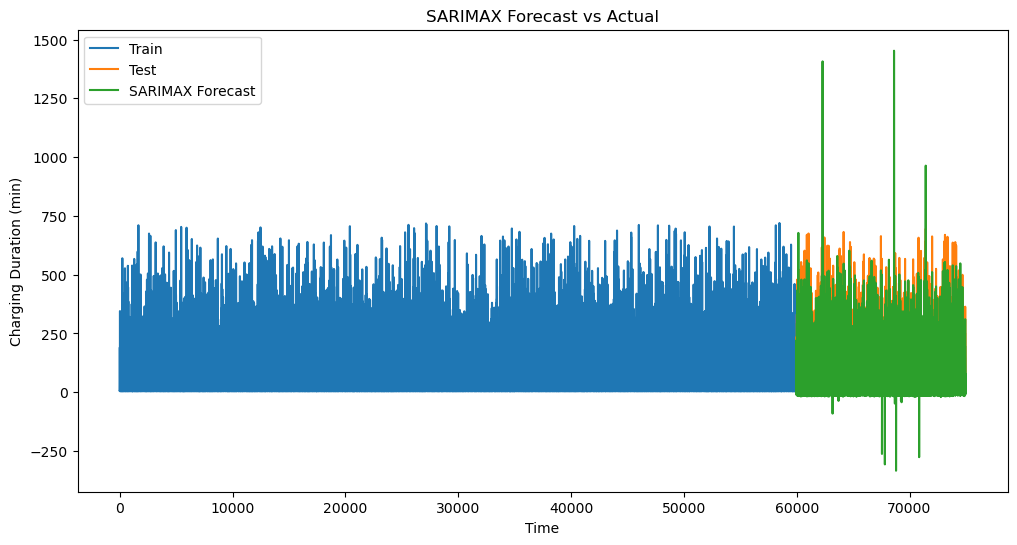

In [12]:
# Visualization: Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(range(len(train_series)), train_series, label='Train')
plt.plot(range(len(train_series), len(train_series)+len(test_series)), test_series.values, label='Test')
plt.plot(range(len(train_series), len(train_series)+len(test_series)), forecast, label='SARIMAX Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Charging Duration (min)')
plt.title('SARIMAX Forecast vs Actual')
plt.show()

In [ ]:
# # import warnings
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # warnings.filterwarnings("ignore")

# best_score = float('inf')
# best_order = None
# best_seasonal_order = None

# # Define ranges for p, d, q and seasonal parameters (P, D, Q, s)
# for p in range(0, 3):
#     for d in range(0, 2):
#         for q in range(0, 3):
#             for P in range(0, 2):
#                 for D in range(0, 2):
#                     for Q in range(0, 2):
#                         for s in [0, 4, 7, 12]:  # Try no seasonality, weekly, and yearly
#                             try:
#                                 model = SARIMAX(
#                                     y_train['charging_duration_min'],
#                                     exog=X_train,
#                                     order=(p, d, q),
#                                     seasonal_order=(P, D, Q, s)
#                                 )
#                                 model_fit = model.fit(disp=False)
#                                 forecast = model_fit.predict(
#                                     start=len(y_train),
#                                     end=len(y_train)+len(y_test)-1,
#                                     exog=X_test
#                                 )
#                                 mse = mean_squared_error(y_test['charging_duration_min'], forecast)
#                                 if mse < best_score:
#                                     best_score = mse
#                                     best_order = (p, d, q)
#                                     best_seasonal_order = (P, D, Q, s)
#                             except:
#                                 continue

# print(f"Best SARIMAX order: {best_order} seasonal_order: {best_seasonal_order} with Test MSE: {best_score:.2f}")

# # Fit and evaluate the best model
# model = SARIMAX(
#     y_train['charging_duration_min'],
#     exog=X_train,
#     order=best_order,
#     seasonal_order=best_seasonal_order
# )
# model_fit = model.fit(disp=False)
# forecast = model_fit.predict(
#     start=len(y_train),
#     end=len(y_train)+len(y_test)-1,
#     exog=X_test
# )

# mse = mean_squared_error(y_test['charging_duration_min'], forecast)
# mae = mean_absolute_error(y_test['charging_duration_min'], forecast)
# r2 = r2_score(y_test['charging_duration_min'], forecast)

# print(f"Test MSE: {mse:.2f}")
# print(f"Test MAE: {mae:.2f}")
# print(f"Test R2 Score: {r2:.2f}")

# # Visualization
# plt.figure(figsize=(12,6))
# plt.plot(range(len(y_train)), y_train['charging_duration_min'], label='Train')
# plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test['charging_duration_min'].values, label='Test')
# plt.plot(range(len(y_train), len(y_train)+len(y_test)), forecast, label='SARIMAX Forecast')
# plt.legend()
# plt.xlabel('Time')
# plt.ylabel('Charging Duration (min)')
# plt.title('SARIMAX Forecast vs Actual (Best Order)')
# plt.show()